In [2]:
import os
import sys
import tensorflow.compat.v1 as tf

sys.path.append('automl/efficientdet')

import hparams_config
from tf2 import anchors
from model_inspect import ModelInspector

In [3]:
import pandas as pd
import xml.etree.ElementTree as ET
import math

CLASSES = ['1', '2']

def get_bboxes_from_xml(xml_file):
  tree = ET.parse(xml_file)
  root = tree.getroot()
  bboxes = []
  bbox_names = []

  if root.iter('object') is not None:
    for obj in root.iter('object'):
      bbox_name = obj.find('name').text
      if bbox_name not in CLASSES:
        continue
      
      xmlbox = obj.find('bndbox')
      x1 = math.ceil(float(xmlbox.find('xmin').text))
      y1 = math.ceil(float(xmlbox.find('ymin').text))
      x2 = math.ceil(float(xmlbox.find('xmax').text))
      y2 = math.ceil(float(xmlbox.find('ymax').text))

      if x1 == x2 or y1 == y2:
        continue

      bbox = [x1, y1, x2, y2]
      bboxes.append(bbox)
      bbox_names.append(bbox_name)

  return bbox_names, bboxes

In [4]:
bbox_names, bboxes = get_bboxes_from_xml('poolncar/training_data/training_data/labels/000000000.xml')
print(f'class names: {bbox_names}')
print(f'bbox info: {bboxes}')

class names: ['1', '1', '1', '1']
bbox info: [[59, 153, 70, 164], [11, 206, 22, 217], [41, 0, 51, 4], [47, 42, 58, 53]]


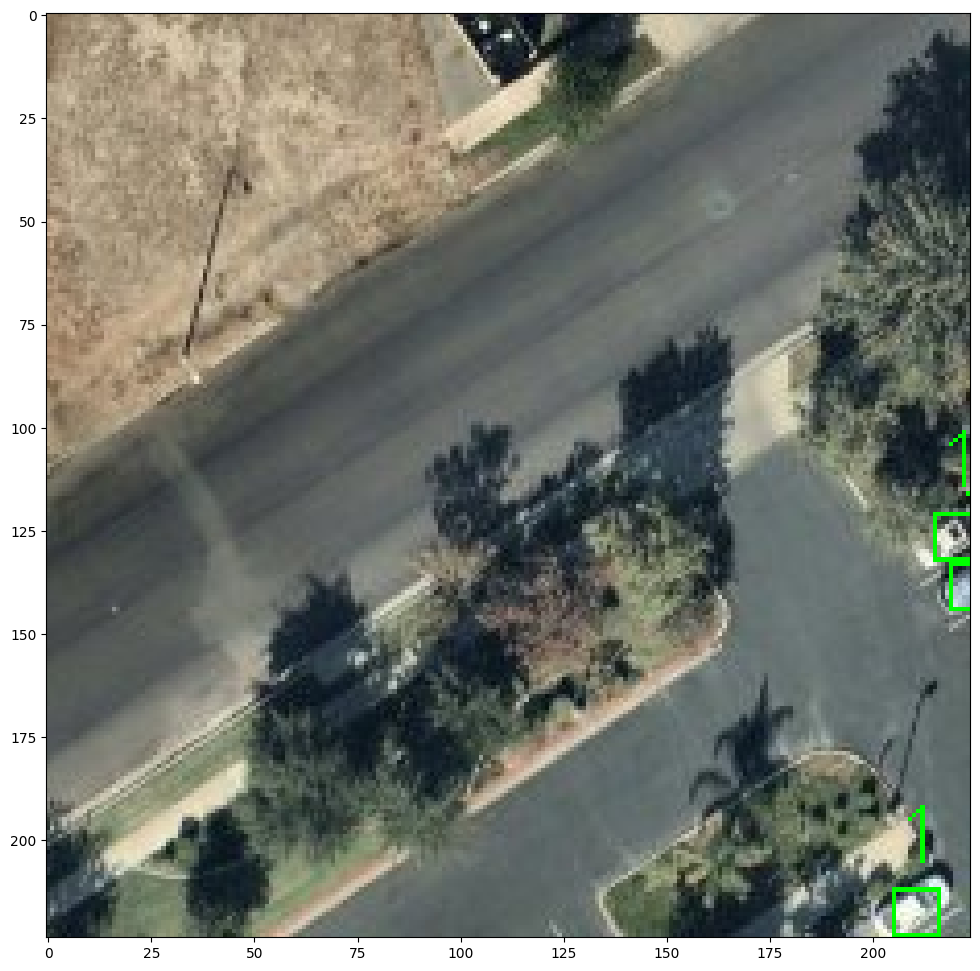

In [5]:
import matplotlib.pyplot as plt
import cv2

img_rgb = cv2.cvtColor(cv2.imread('poolncar/training_data/training_data/images/000000002.jpg'), cv2.COLOR_BGR2RGB)

bbox_names, bboxes = get_bboxes_from_xml('poolncar/training_data/training_data/labels/000000002.xml')
for box_name, box in zip(bbox_names, bboxes):
  cv2.rectangle(img_rgb, (box[0], box[1]), (box[2], box[3]), color=(0, 255, 0), thickness=1)
  cv2.putText(img_rgb, box_name, (int(box[0]), int(box[1] - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 1)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [6]:
import os

ANNO_DIR = 'poolncar/training_data/training_data/labels'
file_list = os.listdir(ANNO_DIR)
xml_files = sorted([file for file in file_list if file.endswith('.xml')])

print('xml file list:', xml_files)
print('xml file length:', len(xml_files))

xml file list: ['000000000.xml', '000000001.xml', '000000002.xml', '000000003.xml', '000000004.xml', '000000005.xml', '000000006.xml', '000000007.xml', '000000008.xml', '000000009.xml', '000000010.xml', '000000011.xml', '000000012.xml', '000000013.xml', '000000014.xml', '000000015.xml', '000000016.xml', '000000017.xml', '000000018.xml', '000000019.xml', '000000020.xml', '000000021.xml', '000000022.xml', '000000023.xml', '000000024.xml', '000000025.xml', '000000026.xml', '000000027.xml', '000000028.xml', '000000029.xml', '000000030.xml', '000000031.xml', '000000032.xml', '000000033.xml', '000000034.xml', '000000035.xml', '000000036.xml', '000000037.xml', '000000038.xml', '000000039.xml', '000000040.xml', '000000041.xml', '000000042.xml', '000000043.xml', '000000044.xml', '000000045.xml', '000000046.xml', '000000047.xml', '000000048.xml', '000000049.xml', '000000050.xml', '000000051.xml', '000000052.xml', '000000053.xml', '000000054.xml', '000000055.xml', '000000056.xml', '000000057.xml'

In [7]:
import xml.etree.ElementTree as ET

def get_anno_dict_from_xml(xml_filepath):
  tree = ET.parse(xml_filepath)
  root = tree.getroot()
  objects = []

  filename = root.find('filename').text
  size = root.find('size')
  width = int(size.find('width').text)
  height = int(size.find('height').text)

  for obj in root.findall('object'):
    name = obj.find('name').text
    pose = 'Unspecified'
    truncated = 0
    difficult = 0
    occluded = 0

    xmlbox = obj.find('bndbox')
    xmin = math.ceil(float(xmlbox.find('xmin').text))
    ymin = math.ceil(float(xmlbox.find('ymin').text))
    xmax = math.ceil(float(xmlbox.find('xmax').text))
    ymax = math.ceil(float(xmlbox.find('ymax').text))
    bndbox = { 'xmin': xmin, 'ymin': ymin, 'xmax': xmax, 'ymax': ymax }
    
    single_obj = { 'name':  name, 'pose': pose, 'truncated': truncated, 'difficult': difficult, occluded: 'occluded', 'bndbox': bndbox }
    objects.append(single_obj)

  anno_dict = { 'folder': 'training_data', 'filename': filename, 'width': width, 'height': height, 'object': objects }

  return anno_dict

In [8]:
anno_dict = get_anno_dict_from_xml('poolncar/training_data/training_data/labels/000000000.xml')

anno_dict

{'folder': 'training_data',
 'filename': '000000000.jpg',
 'width': 224,
 'height': 224,
 'object': [{'name': '1',
   'pose': 'Unspecified',
   'truncated': 0,
   'difficult': 0,
   0: 'occluded',
   'bndbox': {'xmin': 59, 'ymin': 153, 'xmax': 70, 'ymax': 164}},
  {'name': '1',
   'pose': 'Unspecified',
   'truncated': 0,
   'difficult': 0,
   0: 'occluded',
   'bndbox': {'xmin': 11, 'ymin': 206, 'xmax': 22, 'ymax': 217}},
  {'name': '1',
   'pose': 'Unspecified',
   'truncated': 0,
   'difficult': 0,
   0: 'occluded',
   'bndbox': {'xmin': 41, 'ymin': 0, 'xmax': 51, 'ymax': 4}},
  {'name': '1',
   'pose': 'Unspecified',
   'truncated': 0,
   'difficult': 0,
   0: 'occluded',
   'bndbox': {'xmin': 47, 'ymin': 42, 'xmax': 58, 'ymax': 53}}]}

In [9]:
class Unique_Id(object):
  def __init__(self) -> None:
    self.image_id = 0
    self.anno_id = 0

  def get_image_id(self) -> int:
    self.image_id += 1
    
    return self.image_id

  def get_anno_id(self) -> int:
    self.anno_id += 1
    
    return self.anno_id

In [10]:
import tensorflow as tf
from dataset import tfrecord_util

def make_tfrecord_example(example_dict):
  example = tf.train.Example(
        features=tf.train.Features(
            feature={
                'image/height': tfrecord_util.int64_feature(example_dict['height']),
                'image/width': tfrecord_util.int64_feature(example_dict['width']),
                'image/filename': tfrecord_util.bytes_feature(example_dict['filename']),
                'image/source_id': tfrecord_util.bytes_feature(example_dict['source_id']),
                'image/key/sha256': tfrecord_util.bytes_feature(example_dict['key_sha256']),
                'image/encoded': tfrecord_util.bytes_feature(example_dict['encoded']),
                'image/format': tfrecord_util.bytes_feature('jpeg'.encode('utf8')),
                'image/object/bbox/xmin': tfrecord_util.float_list_feature(example_dict['xmin']),
                'image/object/bbox/xmax': tfrecord_util.float_list_feature(example_dict['xmax']),
                'image/object/bbox/ymin': tfrecord_util.float_list_feature(example_dict['ymin']),
                'image/object/bbox/ymax': tfrecord_util.float_list_feature(example_dict['ymax']),
                'image/object/area': tfrecord_util.float_list_feature(example_dict['area']),
                'image/object/class/text': tfrecord_util.bytes_list_feature(example_dict['class_text']),
                'image/object/class/label': tfrecord_util.int64_list_feature(example_dict['class_label']),
                'image/object/difficult': tfrecord_util.int64_list_feature(example_dict['difficult']),
                'image/object/truncated': tfrecord_util.int64_list_feature(example_dict['truncated']),
                'image/object/view': tfrecord_util.bytes_list_feature(example_dict['poses']),
            }))
  
  return example

In [11]:
import hashlib
import io
import os
import PIL.Image
import tensorflow as tf
from dataset import tfrecord_util

def dict_to_tf_example(data, image_path, label_map_dict, unique_id, ignore_difficult_instances=False, debug=True):
  with tf.io.gfile.GFile(image_path, 'rb') as fid:
    encoded_jpg = fid.read()

  encoded_jpg_io = io.BytesIO(encoded_jpg)
  image = PIL.Image.open(encoded_jpg_io)

  if image.format != 'JPEG':
    raise ValueError('Image format not JPEG')

  key = hashlib.sha256(encoded_jpg).hexdigest()

  image_id = unique_id.get_image_id()
  width = data['width']
  height = data['height']

  xmins, ymins, xmaxes, ymaxes = [], [], [], []
  areas, classes, classes_texts = [], [], []
  truncated, poses, difficult_obj = [], [], []

  if 'object' in data:
    for obj in data['object']:
      difficult = bool(int(obj['difficult']))
      if ignore_difficult_instances and difficult:
        continue
      if obj['name'] not in label_map_dict:
        continue

      difficult_obj.append(int(difficult))
      xmins.append(float(obj['bndbox']['xmin']) / width)
      ymins.append(float(obj['bndbox']['ymin']) / height)
      xmaxes.append(float(obj['bndbox']['xmax']) / width)
      ymaxes.append(float(obj['bndbox']['ymax']) / height)
      areas.append((xmaxes[-1] - xmins[-1]) * (ymaxes[-1] - ymins[-1]))

      classes_texts.append(obj['name'].encode('utf8'))
      classes.append(label_map_dict[obj['name']])
      truncated.append(int(obj['truncated']))
      poses.append(obj['pose'].encode('utf8'))
      difficult_obj.append(obj['difficult'])

  example_dict = {
      'height':height, 'width':width, 'filename':data['filename'].encode('utf8'),
      'source_id': str(image_id).encode('utf8'), 'key_sha256': key.encode('utf8'),
      'encoded': encoded_jpg, 'format':'jpeg'.encode('utf8'),
      'xmin':xmins, 'xmax':xmaxes, 'ymin':ymins, 'ymax':ymaxes,
      'area':areas, 'class_text':classes_texts, 'class_label':classes,
      'difficult':difficult_obj, 'truncated':truncated, 'poses':poses
  }

  if debug:
    print('example_dict:', example_dict)

  example = make_tfrecord_example(example_dict)

  return example

In [12]:
label_map_dict = { '1': 1, '2': 2 }

unique_id = Unique_Id()
data = get_anno_dict_from_xml('poolncar/training_data/training_data/labels/000000000.xml')
print('## xml -> data dic:', data, '\n')
image_path = 'poolncar/training_data/training_data/images/000000000.jpg'

example = dict_to_tf_example(data, image_path, label_map_dict, unique_id, ignore_difficult_instances=False)

example

## xml -> data dic: {'folder': 'training_data', 'filename': '000000000.jpg', 'width': 224, 'height': 224, 'object': [{'name': '1', 'pose': 'Unspecified', 'truncated': 0, 'difficult': 0, 0: 'occluded', 'bndbox': {'xmin': 59, 'ymin': 153, 'xmax': 70, 'ymax': 164}}, {'name': '1', 'pose': 'Unspecified', 'truncated': 0, 'difficult': 0, 0: 'occluded', 'bndbox': {'xmin': 11, 'ymin': 206, 'xmax': 22, 'ymax': 217}}, {'name': '1', 'pose': 'Unspecified', 'truncated': 0, 'difficult': 0, 0: 'occluded', 'bndbox': {'xmin': 41, 'ymin': 0, 'xmax': 51, 'ymax': 4}}, {'name': '1', 'pose': 'Unspecified', 'truncated': 0, 'difficult': 0, 0: 'occluded', 'bndbox': {'xmin': 47, 'ymin': 42, 'xmax': 58, 'ymax': 53}}]} 

example_dict: {'height': 224, 'width': 224, 'filename': b'000000000.jpg', 'source_id': b'1', 'key_sha256': b'5ec019893b646aa03ec7cacb33b9038e4cc0c41848c6ea056074c1ae29c79bc4', 'encoded': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03

features {
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\005\003\004\004\004\003\005\004\004\004\005\005\005\006\007\014\010\007\007\007\007\017\013\013\t\014\021\017\022\022\021\017\021\021\023\026\034\027\023\024\032\025\021\021\030!\030\032\035\035\037\037\037\023\027\"$\"\036$\034\036\037\036\377\333\000C\001\005\005\005\007\006\007\016\010\010\016\036\024\021\024\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\036\377\300\000\021\010\000\340\000\340\003\001\"\000\002\021\001\003\021\001\377\304\000\035\000\000\002\002\003\001\001\001\000\000\000\000\000\000\000\000\000\005\006\004\007\002\003\010\001\000\t\377\304\000@\020\000\002\001\002\005\002\003\006\003\006\004\006\002\003\000\000\001\002\003\004\021\000\005\

In [13]:
file_id_list = sorted([xml_file[:xml_file.rfind('.xml')] for xml_file in os.listdir('poolncar/training_data/training_data/labels') if '.xml' in xml_file])

len(file_id_list), file_id_list

(3748,
 ['000000000',
  '000000001',
  '000000002',
  '000000003',
  '000000004',
  '000000005',
  '000000006',
  '000000007',
  '000000008',
  '000000009',
  '000000010',
  '000000011',
  '000000012',
  '000000013',
  '000000014',
  '000000015',
  '000000016',
  '000000017',
  '000000018',
  '000000019',
  '000000020',
  '000000021',
  '000000022',
  '000000023',
  '000000024',
  '000000025',
  '000000026',
  '000000027',
  '000000028',
  '000000029',
  '000000030',
  '000000031',
  '000000032',
  '000000033',
  '000000034',
  '000000035',
  '000000036',
  '000000037',
  '000000038',
  '000000039',
  '000000040',
  '000000041',
  '000000042',
  '000000043',
  '000000044',
  '000000045',
  '000000046',
  '000000047',
  '000000048',
  '000000049',
  '000000050',
  '000000051',
  '000000052',
  '000000053',
  '000000054',
  '000000055',
  '000000056',
  '000000057',
  '000000058',
  '000000059',
  '000000060',
  '000000061',
  '000000062',
  '000000063',
  '000000064',
  '000000065',
  '

In [14]:
import pandas as pd

pd.set_option('display.max_colwidth', 300)
data_df = pd.DataFrame({'file_id': file_id_list})
data_df['image_path'] = 'poolncar/training_data/training_data/images/' + data_df['file_id'] + '.jpg'
data_df['xml_path'] = 'poolncar/training_data/training_data/labels/' + data_df['file_id'] + '.xml'

print(data_df.shape)
data_df.head()

(3748, 3)


,file_id,image_path,xml_path
0,000000000,poolncar/training_data/training_data/images/000000000.jpg,poolncar/training_data/training_data/labels/000000000.xml
1,000000001,poolncar/training_data/training_data/images/000000001.jpg,poolncar/training_data/training_data/labels/000000001.xml
2,000000002,poolncar/training_data/training_data/images/000000002.jpg,poolncar/training_data/training_data/labels/000000002.xml
3,000000003,poolncar/training_data/training_data/images/000000003.jpg,poolncar/training_data/training_data/labels/000000003.xml
4,000000004,poolncar/training_data/training_data/images/000000004.jpg,poolncar/training_data/training_data/labels/000000004.xml


In [15]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(data_df, test_size=0.2, random_state=2021)

train_df.shape, val_df.shape

((2998, 3), (750, 3))

In [16]:
def make_tfrecords(meta_df, output_dir, output_prefix, num_shards):
  xml_list = meta_df['xml_path'].to_list()
  image_list = meta_df['image_path'].to_list()

  unique_id = Unique_Id()

  writers = [tf.io.TFRecordWriter(output_dir + output_prefix + '-%05d-of-%05d.tfrecord' % (i, num_shards)) for i in range(num_shards)]

  for idx, xml_path in enumerate(xml_list):
    if idx % 100 == 0:
      print('On image:', idx, 'of ', len(xml_list))
    
    data = get_anno_dict_from_xml(xml_path)
    image_path = image_list[idx]
    tf_example = dict_to_tf_example(data, image_path, label_map_dict, unique_id)
    writers[idx % num_shards].write(tf_example.SerializeToString())

  for writer in writers:
    writer.close()

In [17]:
# print('#### train tfrecords ####')
# make_tfrecords(train_df, 'tfrecord/train/', 'train', num_shards=100)

# print('#### val tfrecords ####')
# make_tfrecords(val_df, 'tfrecord/val/', 'val', num_shards=100)

In [18]:
def download(m):
  if m not in os.listdir():
    !wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/{m}.tar.gz
    !tar zxf {m}.tar.gz
  ckpt_path = os.path.join(os.getcwd(), m)

  return ckpt_path

In [19]:
MODEL = 'efficientdet-d2'

ckpt_path = download(MODEL)
print('Use model in {}'.format(ckpt_path))

Use model in /home/22VR039T/workspace/deep-learning-cv/efficientdet/efficientdet-d2


In [20]:
class TRAIN_CFG:
  model_name = 'efficientdet-d2' # efficientdet 모델명
  strategy = '' # tpu, 여러개의 GPU들, 단일 GPU 일때 학습 strategy 설정. 
  model_dir = 'model_trained_d2' # 학습된 모델이 저장될 위치
  pretrained_ckpt = 'efficientdet-d2' # coco로 pretrained된 checkpoint 파일이 있는 디렉토리 위치
  # num_classes는 2개임. 
  hparams = 'num_classes=2,moving_average_decay=0,mixed_precision=true'
  use_xla = False
  use_fake_data = False
  # max_instances_per_image를 200으로 설정하고, D2 모델이 상대적으로 더 크기 때문에 batch_size를 8로 설정시 GPU Out of Memory 발생 
  batch_size = 4
  eval_samples = 5000 # evaluation image 데이터 갯수
  steps_per_execution = 1 # train 시 steps 횟수
  num_examples_per_epoch = 3000 # 1 epochs 시 적용하는 examples 개수 
  num_epochs = 20 # epochs 횟수
  train_file_pattern = 'tfrecord/train/train-*.tfrecord' # 학습용 tfrecords를 glob 형태로 가져오는 표현식. 
  val_file_pattern = 'tfrecord/val/val-*.tfrecord' # 검증용 tfrecords를 glob 형태로 가져오는 표현식. 
  val_json_file = None # optional coco validation json 
  mode = 'traineval' # train만 적용 또는 train과 eval함께 적용(traineval)
  num_shards = 100 # 
  # max_instances_per_image는 기본 100개임. 1개의 이미지에  특정 object의 갯수가 100개를 초과하는 경우가 있음. 200으로 수정. 
  max_instances_per_image = 200
  
  num_cores = 2 # tpu 일때 8 적용.  
  tpu = None
  gcp_project = None
  tpu_zone = None
  eval_master = ''
  eval_name = None
  tf_random_seed = 2021
  profile = False
  debug = False

In [23]:
from tf2.train import setup_model
import hparams_config
import utils
from tf2 import train_lib, util_keras

config = hparams_config.get_detection_config(TRAIN_CFG.model_name)
config.override(TRAIN_CFG.hparams)

steps_per_epoch = TRAIN_CFG.num_examples_per_epoch // TRAIN_CFG.batch_size

if tf.config.list_physical_devices('GPU'):
  ds_strategy = tf.distribute.OneDeviceStrategy('device:GPU:0')
else:
  ds_strategy = tf.distribute.OneDeviceStrategy('device:CPU:0')

print(ds_strategy)

params = dict(
      profile=TRAIN_CFG.profile,
      mode = TRAIN_CFG.mode,
      model_name=TRAIN_CFG.model_name,
      steps_per_execution=TRAIN_CFG.steps_per_execution,
      num_epochs = TRAIN_CFG.num_epochs,
      model_dir=TRAIN_CFG.model_dir,
      steps_per_epoch=steps_per_epoch,
      strategy=TRAIN_CFG.strategy,
      batch_size=TRAIN_CFG.batch_size,
      tf_random_seed=TRAIN_CFG.tf_random_seed,
      debug=TRAIN_CFG.debug,
      val_json_file=TRAIN_CFG.val_json_file,
      eval_samples=TRAIN_CFG.eval_samples,
      num_shards=ds_strategy.num_replicas_in_sync,
      # max_instances_per_image는 기본 100개임. 1개의 이미지에  특정 object의 갯수가 100개를 초과하는 경우가 있음. 200으로 수정.
      max_instances_per_image = TRAIN_CFG.max_instances_per_image
      )

config.override(params, True)
config.image_size = utils.parse_image_size(config.image_size)

config

ModuleNotFoundError: No module named 'tensorflow.python.checkpoint'

In [ ]:
import dataloader

def get_dataset(is_training, config):
  file_pattern = TRAIN_CFG.train_file_pattern if is_training else TRAIN_CFG.val_file_pattern
  if not file_pattern:
    raise ValueError('No matching files.')
  
  return dataloader.InputReader(file_pattern, is_training=is_training, use_fake_data=TRAIN_CFG.use_fake_data, max_instances_per_image=config.max_instances_per_image, debug=TRAIN_CFG.debug)(config.as_dict())

In [ ]:
from tf2 import train_lib, train

def get_efficientdet_model(config):
  model = train_lib.EfficientDetNetTrain(config=config)
  model = train.setup_model(model, config)

  if TRAIN_CFG.pretrained_ckpt:
    ckpt_path = tf.train.latest_checkpoint(TRAIN_CFG.pretrained_ckpt)
    util_keras.restore_ckpt(model, ckpt_path, config.moving_average_decay, exclude_layers=['class_net'])

  train.init_experimental(config)

  return model

In [ ]:
model = get_efficientdet_model(config)
model.summary()

automl/efficientdet/utils.py:23: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  from tensorflow.python.tpu import tpu_function  # pylint:disable=g-direct-tensorflow-import
automl/efficientdet/utils.py:255: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  for u in self.updates:


Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b2 (Model)     multiple                  7267314   
                                                                 
 resample_p6 (ResampleFeatur  multiple                 39984     
 eMap)                                                           
                                                                 
 resample_p7 (ResampleFeatur  multiple                 0         
 eMap)                                                           
                                                                 
 fpn_cells (FPNCells)        multiple                  678479    
                                                                 
 class_net (ClassNet)        multiple                  50754     
                                                                 
 box_net (BoxNet)            multiple                  52788     


In [ ]:
print(config.mode)

traineval


In [ ]:
config.batch_size = 4
tr_steps_per_epoch = train_df.shape[0] // config.batch_size
val_steps_per_epoch = val_df.shape[0] // config.batch_size
print('tr_steps_per_epoch:', tr_steps_per_epoch, 'val_steps_per_epoch:', val_steps_per_epoch)

val_dataset = get_dataset(False, config) if 'eval' in config.mode else None
model.fit(get_dataset(True, config), epochs=20, steps_per_epoch=tr_steps_per_epoch, callbacks=train_lib.get_callbacks(config.as_dict(), val_dataset), 
          validation_data=val_dataset, validation_steps=val_steps_per_epoch)

tf.keras.backend.clear_session()

tr_steps_per_epoch: 749 val_steps_per_epoch: 187
Epoch 1/20


automl/efficientdet/utils.py:23: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  from tensorflow.python.tpu import tpu_function  # pylint:disable=g-direct-tensorflow-import
automl/efficientdet/utils.py:255: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  for u in self.updates:


  5/749 [..............................] - ETA: 1:09:48 - det_loss: 431.9486 - cls_loss: 431.3319 - box_loss: 0.0123 - reg_l2_loss: 0.0947 - loss: 432.0433 - learning_rate: 0.0080 - gradient_norm: 10.0000

KeyboardInterrupt: 